In [3]:
import csv

with open('response.csv') as f:
    reader = csv.reader(f)
    response = [[float(i[0])] for i in list(reader)]

with open('data.csv') as f:
    reader = csv.reader(f)
    data = [[float(i) for i in el] for el in list(reader)]

    
    

X= data
Y = response

In [4]:
import dcgpy
import pygmo as pg
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:

def my_fun(x):
    return 1/(sum([it for it in x]))

def my_fun_print(x):
    return "1/(" + "+".join([it for it in x]) + ")"


In [6]:
ss = dcgpy.kernel_set_double(["sum", "diff", "mul", "pdiv", "sig"])

In [7]:
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss(),    
    rows = 1,
    cols = 100,
    n_eph = 5,
    levels_back = 20)
print(udp)

	Data dimension (points): 143
	Data dimension (labels): 1
	Data size: 4262
	Kernels: [sum, diff, mul, pdiv, sig]
	Loss: MSE



In [8]:
uda  = dcgpy.es4cgp(gen = 10000, max_mut = 4)

In [9]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
algo.set_verbosity(1000)
pop = pg.population(prob, 100)

In [10]:
pop = algo.evolve(pop)


   Gen:        Fevals:          Best:	Constants:	Model:
      0              0        7712.13	[ -7.90427 5.87928 1.86245 4.16304 4.26192 ]	[(((sig((c4 + x69)/x98 + x54*x115/x41 +  ...
   1000         100000        38.3312	[ -8.01827 6.06121 1.86009 4.03688 4.33763 ]	[(((-c4/(x69*x23) - (x13 - x56 - c4/(x69 ...
   2000         200000        37.3617	[ -7.87556 6.05047 1.83061 4.03196 4.15735 ]	[(((-c4/(x69*x23) - (x44 - x56 - c4/(x69 ...
   3000         300000        36.6016	[ -7.83495 5.87974 1.90562 4.05154 4.3916 ]	[(((-c4/(x69*x23) - (x44 - x56 - c4/(x69 ...
   4000         400000        35.8829	[ -7.8533 6.13021 1.83031 3.99385 4.18869 ]	[(((-c4/(x69*x38) - (x44 - x56 - c4/(x69 ...
   5000         500000        35.7304	[ -7.78668 5.93343 2.03062 3.99211 4.30535 ]	[(((-c4/(x69*x38) - (x44 - x56 - c4/(x69 ...
   6000         600000         35.551	[ -7.96445 5.9247 1.89896 3.98856 4.15018 ]	[(sig((1/2)*x69*x38*sig(c4/(x69*x38) + c ...
   7000         700000         35.499	[ -7.89928 5

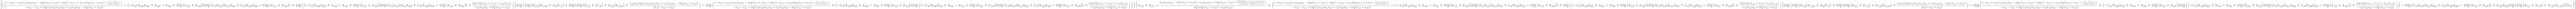

In [11]:
parse_expr(udp.prettier(pop.champion_x))

In [12]:
Y_pred = udp.predict(X, pop.champion_x)

In [13]:
import numpy as np
print(Y_pred-Y)
mse = np.square(np.subtract(Y_pred, Y)).mean()
print(mse)

[[ 5.7601926 ]
 [ 4.7601926 ]
 [ 3.7601926 ]
 ...
 [-5.14573509]
 [-2.14573509]
 [-2.14573509]]
35.32790373775121
